In [1]:
print(__doc__)

Automatically created module for IPython interactive environment


In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import signal
from sklearn.decomposition import FastICA, PCA

# Generate sample data

In [3]:
np.random.seed(0)
n_samples=10000
time = np.linspace(0,8,n_samples)

s1 = np.sin(2*time) # Signal 1 : sinusoidal signal
s2 = np.sign(np.sin(3*time)) # Signal 2 : square signal
s3 = signal.sawtooth(2 * np.pi * time) # Signal 3 : saw tooth signal

S= np.c_[s1,s2,s3]
#S += 0.2 * np.random.normal(size=S.shape) # Add noise

S /= S.std(axis=0) # Standardize data
print(S)

[[ 0.          0.         -1.73187772]
 [ 0.0023184   1.00116122 -1.72910643]
 [ 0.0046368   1.00116122 -1.72633515]
 ..., 
 [-0.4126881  -1.00116122  1.72633515]
 [-0.41490993 -1.00116122  1.72910643]
 [-0.4171307  -1.00116122 -1.73187772]]


# Mix data

In [4]:
A = np.array([[1,2,1],[3.5,2,1.0], [1.5,0.5,2.0]]) # Mixing matrix
X = np.dot(S, A.T) # Generate observations
print(X)

[[-1.73187772 -1.73187772 -3.46375543]
 [ 0.27553442  0.28133042 -2.95415465]
 [ 0.28062409  0.29221609 -2.9451345 ]
 ..., 
 [-0.68867539 -1.72039563  2.33305755]
 [-0.68812595 -1.72540077  2.33526736]
 [-4.15133087 -5.19415763 -4.5900321 ]]


# Compute ICA

In [5]:
ica = FastICA(n_components=3)
S_ = ica.fit_transform(X) # Reconstruct signals
A_ = ica.mixing_ # Get estimated mixing matrix
print(A_)
print(ica.mean_)

[[ -98.26638344 -102.41114367 -201.99852794]
 [-347.42002854 -116.9823135  -216.4948082 ]
 [-136.51559375 -207.31258636  -51.2878123 ]]
[ 0.27119742  0.71428343  0.2887362 ]


# We can prove that the ICA model applies by reverting the unmixing

In [6]:
assert np.allclose(X, np.dot(S_,A_.T) + ica.mean_)

# Plot figures

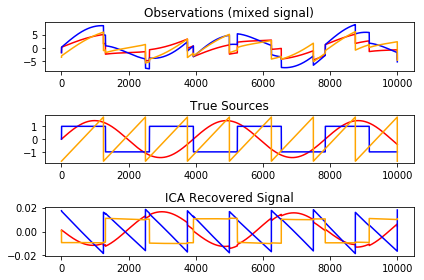

In [9]:
plt.figure()

models = [X, S, S_]
names=['Observations (mixed signal)',
      'True Sources',
      'ICA Recovered Signal']
colors=['red','blue','orange']

for ii,(model,name) in enumerate(zip(models, names),1):
    plt.subplot(3,1,ii)
    plt.title(name)
    for sig,color in zip(model.T, colors):
        plt.plot(sig, color=color)

#plt.subplots_adjust(0.1,0.1,0.1,0.1)
plt.tight_layout()
plt.show()


# Setting output procedure

In [ ]:
import wave
outputFolder='primitiveWaves/'
noise_output= wave.open(outputFolder+'sinustrue.wav','w')
noise_output.setparams((2,2,16000,0,'NONE','not compressed'))
noise_output.writeframes(np.ndarray.tobytes(s1))
noise_output.close()

In [ ]:
noise_output= wave.open(outputFolder+'squaretrue.wav','w')
noise_output.setparams((2,2,16000,0,'NONE','not compressed'))
noise_output.writeframes(np.ndarray.tobytes(s2))
noise_output.close()

In [ ]:
noise_output= wave.open(outputFolder+'sawtoothtrue.wav','w')
noise_output.setparams((2,2,16000,0,'NONE','not compressed'))
noise_output.writeframes(np.ndarray.tobytes(s3))
noise_output.close()

In [ ]:
noise_output= wave.open(outputFolder+'combined.wav','w')
noise_output.setparams((2,2,44100,0,'NONE','not compressed'))
noise_output.writeframes(np.ndarray.tobytes(S))
noise_output.close()

In [ ]:
noise_output= wave.open(outputFolder+'sinusrecovered.wav','w')
noise_output.setparams((2,2,44100,0,'NONE','not compressed'))
print (S_.T[0])
print (s1)
noise_output.writeframes(np.ndarray.tobytes(S_.T[0]))
noise_output.close()